In [12]:
import numpy as np
import os
# from src import dataOrganizer as org

from matplotlib import pyplot as plt
import tensorflow as tf

In [13]:
data_dir = '/home/fizzer/enph_ws/src/immitation_learning/data'

In [27]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="training",
    seed=123,
    image_size=(72, 128),
    color_mode='rgb',
    batch_size=20)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.9,
    subset="training",
    seed=123,
    image_size=(72, 128),
    color_mode='rgb',
    batch_size=20)

Found 8486 files belonging to 4 classes.
Using 7638 files for training.
Found 8486 files belonging to 4 classes.
Using 849 files for training.


In [24]:
# Define the CNN model 
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(72, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')  # 4 output classes: left, right, forward, stop
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 70, 126, 32)       896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 35, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 33, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 28, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 25088)             0

In [28]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
382/382 [==============================] - 93s 242ms/step - loss: 0.8859 - accuracy: 0.6383 - val_loss: 0.6572 - val_accuracy: 0.7256
Epoch 2/20
382/382 [==============================] - 58s 150ms/step - loss: 0.6860 - accuracy: 0.7219 - val_loss: 0.6428 - val_accuracy: 0.7279
Epoch 3/20
382/382 [==============================] - 37s 94ms/step - loss: 0.5782 - accuracy: 0.7637 - val_loss: 0.5046 - val_accuracy: 0.7880
Epoch 4/20
382/382 [==============================] - 37s 95ms/step - loss: 0.5004 - accuracy: 0.7931 - val_loss: 0.5043 - val_accuracy: 0.7880
Epoch 5/20
382/382 [==============================] - 37s 95ms/step - loss: 0.4557 - accuracy: 0.8113 - val_loss: 0.3593 - val_accuracy: 0.8587
Epoch 6/20
382/382 [==============================] - 37s 96ms/step - loss: 0.4073 - accuracy: 0.8336 - val_loss: 0.3895 - val_accuracy: 0.8410
Epoch 7/20
382/382 [==============================] - 37s 96ms/step - loss: 0.4054 - accuracy: 0.8363 - val_loss: 0.3631 - val_accurac

In [29]:
# Save the model in the parent directory in two formats and its training history
model.save('/home/fizzer/enph_ws/src/immitation_learning/models/cnn1.h5')
model.save('/home/fizzer/enph_ws/src/immitation_learning/models/cnn1', save_format='tf')
np.save('/home/fizzer/enph_ws/src/immitation_learning/models/cnn1_history.npy', history.history)


INFO:tensorflow:Assets written to: /home/fizzer/enph_ws/src/immitation_learning/model/cnn1/assets


INFO:tensorflow:Assets written to: /home/fizzer/enph_ws/src/immitation_learning/model/cnn1/assets


Text(0, 0.5, 'Loss')

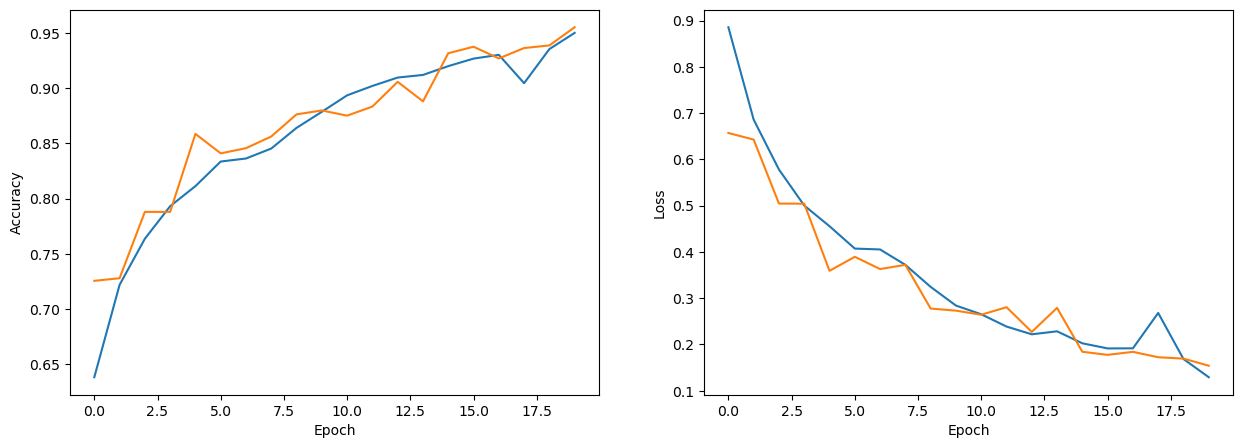

In [34]:
# Plot the training history with figure size and in two diff plots for accuracy and loss
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
